In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os, sys
import re
import json
import glob
import datetime
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
import src.utils as utils

### Columns we can get from a slack message<br>

message_type, message_content, sender_id, time_sent, message_distribution, time_thread_start, reply_count, reply_user_count, time_thread_end, reply_users

From a single slack message, we can get <br>

1. The message<br>
2. Type (message, file, link, etc)<br>
3. The sender_id (assigned by slack)<br>
4. The time the message was sent<br>
5. The team (i don't know what that is now)<br>
6. The type of the message (broadcast message, inhouse, just messgae)<br>
7. The thread the message generated (from here we can go):<br>
    7.1 Text/content of the message<br>
    7.2 The thread time of the message<br>
    7.3 The thread count (reply count)<br>
    7.4 The number of user that reply the message (count of users that participated in the thread)<br>
    7.5 The time the last thread message was sent <br>
    7.6 The users that participated in the thread (their ids are stored as well)<br>

## Insight Extraction

Below are some useful questions to answer. Feel free to explore to answer other interesting questions that may be of help to get insight about student's behaviour, need, and future performance 

In [4]:
sl = SlackDataLoader("/Users/user/slack_data_analysis/data/anonymized")
df = sl.slack_parser("/Users/user/slack_data_analysis/data/anonymized")
print(df.shape)
df.head()

(78, 11)


,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,channel
0,message,``` note: this error originates from a subpro...,Monica Newton,1662708766.558739,text,1662708766.558739,5,2,"U03UUR571A5,U03UH397319",1662711063.142079,all-week3
1,message,how do i set up dvc and mlflow virtual environ...,Cynthia Davis,1662361235.278469,text,1662361235.278469,3,2,"U03V785NLSU,U03UJN29Y4C",1662361827.387729,all-week3
2,message,i might be a little late but there is this pyt...,Melanie Cole,1662624317.113819,text,1662572486.266349,0,0,0,0,all-week3
3,message,join us here for the standup <https://meet.Ste...,Bridget Glover,1662537701.234849,text,0,0,0,0,0,all-week3
4,message,thanks <@u03ug4q7v42>,Monica Newton,1662886814.283949,text,1662840842.871199,0,0,0,0,all-week3


In [5]:
# which user has the highest number of reply counts?
reply_count = df.groupby("sender_name")["reply_count"].max().sort_values()
reply_count[-10:]

sender_name
Monica Newton         5
Maria Martin          5
Rachel Mann           6
Roger Gonzalez        7
Jason Burnett         8
Kenneth Williams      9
Cynthia Davis         9
Dawn Green            9
Jennifer Carrillo    10
Lisa Dickerson       12
Name: reply_count, dtype: int64

<Axes: xlabel='sender_name'>

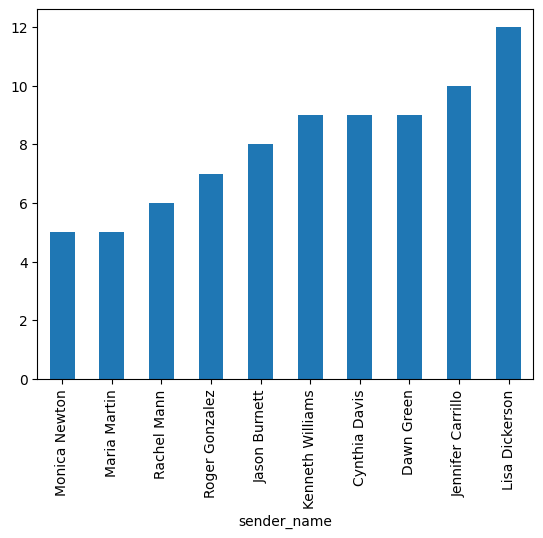

In [6]:
reply_count[-10:].plot(kind="bar")

<Axes: xlabel='sender_name'>

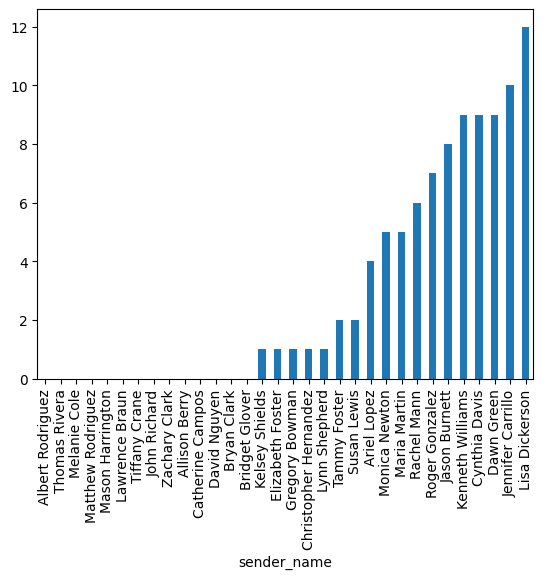

In [7]:
# Visualize reply counts per user per channel
reply_count.plot(kind="bar")

<Axes: xlabel='channel'>

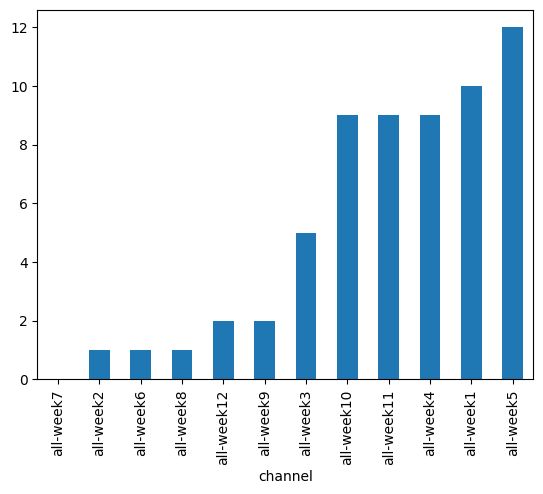

In [17]:
# which user has the highest number of reply counts?
channel_reply_count = df.groupby("channel")["reply_count"].max().sort_values()
channel_reply_count.plot(kind='bar')

In [9]:
# what is the time range of the day that most messages are sent?


In [10]:
# what kind of messages are replied faster than others?

In [11]:
# Relationship between # of messages and # of reactions

In [12]:
# Classify messages into different categories such as questions, answers, comments, etc.

In [13]:
# Which users got the most reactions?

In [14]:
# Model topics mentioned in the channel

In [15]:
# What are the topics that got the most reactions?

### Harder questions to look into

In [16]:
# Based on messages, reactions, references shared, and other relevant data such as classification of questions into techical question, comment, answer, aorder stu the python, statistics, and sql skill level of a user?